En este notebook desarrollaremos el test AB a través de distribuciones beta y apoyándonos en la Regla de Bayes.

Esta metodología nos permite llevar nuestro testeo un nivel más allá y, además, la comprensión del proceso es más sencilla.

No obstante, desde un punto de vista matemático, el proceso es más complejo y deberemos construir diferentes funciones que nos permitan alcanzar el objetivo. Estas funciones podemos encontrarlas en la carpeta libreria_bayes de este mismo repositorio, la cual contiene código desarrollado por [Yonatan Rodriguez Alvarez](https://github.com/YonatanRA).

In [1]:
from libreria_bayes.bayes_func import *

import pandas as pd

Definimos los datos que necesitamos.

Para utiliar este método no necesitamos los datos de la muestra como tal. Será suficiente con definir los resultados obtenidos en cada grupo (grupo de control y grupo de tratamiento).

In [2]:
data = pd.read_csv('data/cookie_cats.csv')

In [3]:
# Obtenemos el número de observaciones para cada grupo.

data.version.value_counts()

gate_40    45489
gate_30    44700
Name: version, dtype: int64

Comenzaremos testeando la retención en un periodo de tiempo de un día (retention_1 en nuestro dataset).

In [4]:
# Obtenemos la cantidad de retenciones por grupo.

data.groupby('version')['retention_1'].value_counts()

version  retention_1
gate_30  False          24666
         True           20034
gate_40  False          25370
         True           20119
Name: retention_1, dtype: int64

In [5]:
control_users = 44700
treatement_users = 45489

control_retentions = 20034
treatement_retentions = 20119

control_ret_rate = control_retentions / control_users

treatement_ret_rate = treatement_retentions / treatement_users

'Rates: ', control_ret_rate, treatement_ret_rate

# Observamos como el ratio para el grupo de tratamiento es menor al de control.
# Esto ya nos da indicios de que los cambios no están funcionando.
# Comprobamos si esta diferencia es estadísticamente significativa.

('Rates: ', 0.4481879194630872, 0.44228274967574577)

In [6]:
# Creamos los betas a priori:

a_C, b_C = control_retentions +1, control_users - control_retentions +1
a_T, b_T = treatement_retentions +1, treatement_users - treatement_retentions +1


beta_C = beta(a_C, b_C)   # control 
beta_T = beta(a_T, b_T)   # treatement (grupo de testeo)

In [7]:
# Calculamos la diferencia en entre la media de las betas (grupo de tratamiento vs. grupo de control)

difference = (beta_T.mean()-beta_C.mean())/beta_C.mean()

difference

-0.013175098158249857

In [8]:
# Calculamos la probabilidad (nivel de significación de la diferencia obtenida):

prob = calc_prob(beta_T, beta_C)

prob

0.037206025180329845

In [9]:
# Resultado del test:

'El test disminuye la tasa de retención en un {:2.2f}%, con una probabilidad del {:2.2f}%. Esta probabilidad es demasiado baja como para considerar que existe una diferencia significativa.'.format(difference*100, prob*100)

'El test disminuye la tasa de retención en un -1.32%, con una probabilidad del 3.72%. Esta probabilidad es demasiado baja como para considerar que existe una diferencia significativa.'

0.4481879194630872 0.44228274967574577


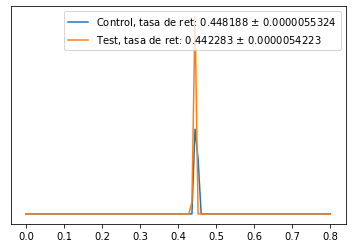

In [10]:
print (control_ret_rate, treatement_ret_rate)

plot([beta_C, beta_T], ['Control', 'Test'])

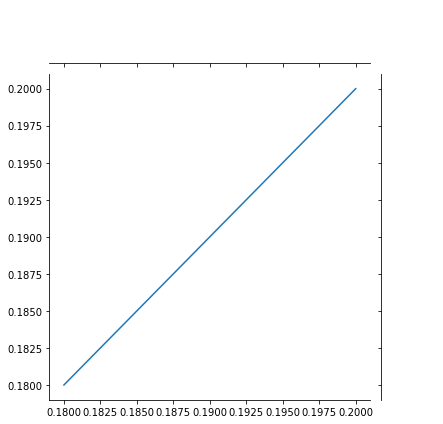

In [11]:
import seaborn as sns

val_C=np.random.beta(a_C, b_C, 50000)
val_T=np.random.beta(a_T, b_T, 50000)

vals=np.vstack([val_C, val_T]).T
limit=0.2

df=pd.DataFrame(vals, columns=['Control','Test'])
df=df[df.Control<limit]
df=df[df.Test<limit]


g=sns.jointplot(x=df.Control, y=df.Test, kind='kde', n_levels=15)
g.ax_joint.plot([0.18, limit], [0.18, limit])
plt.show();

Conclusiones del test para retention_1:

*Según los resultados del test, no podemos afirmar que exista una diferencia significativa entre la retención del grupo de control y el grupo de tratamiento.*

*Podemos afirmar que la implementación de los cambios propuestos no impactará de manera significativa en la tasa de retención y, por tanto, no se recomienda llevarlos a cabo.*

Repetimos el proceso sobre los resultados de retención a siete días (retention_7 en nuestro dataset).

In [12]:
# La cantidad de observaciones sigue siendo la misma que en el caso anterior (control = 44.700; tratamiento = 45.489)

# Obtenemos la cantidad de retenciones por grupo.

data.groupby('version')['retention_7'].value_counts()

version  retention_7
gate_30  False          36198
         True            8502
gate_40  False          37210
         True            8279
Name: retention_7, dtype: int64

In [13]:
control_users_7 = 44700
treatement_users_7 = 45489

control_retentions_7 = 8502
treatement_retentions_7 = 8279

control_ret_7_rate = control_retentions_7 / control_users_7

treatement_ret_7_rate = treatement_retentions_7 / treatement_users_7

'Rates: ', control_ret_7_rate, treatement_ret_7_rate

# Observamos como el ratio de retención es más favorable en el grupo de control, por lo que los cambios propuestos pueden no estar obteniendo el resultado esperado.
# Comprobamos si esta diferencia es estadísticamente significativa.

('Rates: ', 0.19020134228187918, 0.18200004396667327)

In [14]:
# Creamos los betas a priori:

a_C, b_C = control_retentions_7 +1, control_users_7 - control_retentions_7 +1
a_T, b_T = treatement_retentions_7 +1, treatement_users_7 - treatement_retentions_7 +1


beta_C = beta(a_C, b_C)   # control 
beta_T = beta(a_T, b_T)   # treatement (grupo de testeo)

In [15]:
# Calculamos la diferencia entre la media de las betas (grupo de tratamiento vs. grupo de control)

difference_7 = (beta_T.mean()-beta_C.mean())/beta_C.mean()

difference_7

-0.04311526114658881

In [16]:
# Calculamos la probabilidad (nivel de significación de la diferencia obtenida):

prob = calc_prob(beta_T, beta_C)

prob

0.0007773386645759051

In [17]:
# Resultado del test:

'El test aumenta la tasa de retención en un {:2.2f}%, con una probabilidad del {:2.2f}%. Obtenemos una probabilidad muy baja (casi 0), por lo que realmente no existe una diferencia significativa.'.format(difference*100, prob*100)

'El test aumenta la tasa de retención en un -1.32%, con una probabilidad del 0.08%. Obtenemos una probabilidad muy baja (casi 0), por lo que realmente no existe una diferencia significativa.'

0.19020134228187918 0.18200004396667327


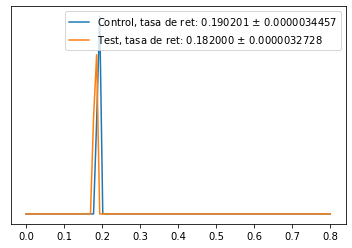

In [18]:
print (control_ret_7_rate, treatement_ret_7_rate)

plot([beta_C, beta_T], ['Control', 'Test'])

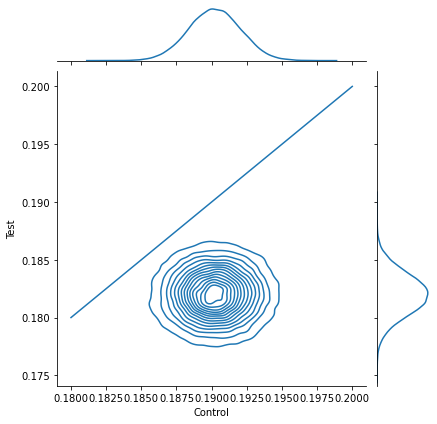

In [19]:
val_C=np.random.beta(a_C, b_C, 50000)
val_T=np.random.beta(a_T, b_T, 50000)

vals=np.vstack([val_C, val_T]).T
limit=0.2

df=pd.DataFrame(vals, columns=['Control','Test'])
df=df[df.Control<limit]
df=df[df.Test<limit]


g=sns.jointplot(x=df.Control, y=df.Test, kind='kde', n_levels=15)
g.ax_joint.plot([0.18, limit], [0.18, limit])
plt.show();

Conclusiones del test para retention_7:

*Llegamos a las mismas conclusiones que en retention_1.*

*Según los resultados del test, no podemos afirmar que exista una diferencia significativa entre la retención del grupo de control y el grupo de tratamiento.*

*Podemos afirmar que la implementación de los cambios propuestos no impactará de manera significativa en la tasa de retención y, por tanto, no se recomienda llevarlos a cabo.*

## Segmentación de usuarios por game rounds.

Profundizamos en el análisis y repetimos los tests teniendo en cuenta la variable sum_gamerounds (indica el nº de partidas jugadas por el usuario durante los 14 primeros días después de instalarse el juego).


Lo que realmente nos interesa es encontrar si los cambios propuestos mejoran la tasa de rentención en algún segmento de usuarios, por lo que nos centraremos en buscar si existe esa mejora en algún segmento (si encontramos un cambio desfavorable en el ratio de retención, nos testearemos su significación. Únicamente lo haremos si esta diferencia es favorable, es decir, si el ratio de retención aumenta).

In [20]:
data.sum_gamerounds.mean()

51.8724567297564

Comenzaremos testeando los usuarios que están por encima de la media (52 rondas).

In [21]:
sub_data = pd.DataFrame(data[data.sum_gamerounds > 52]) # Filtramos los datos.

In [22]:
sub_data.shape # Checkeamos la cantidad de registros.

(22110, 5)

In [23]:
# Obtenemos el número de observaciones para cada grupo.

sub_data.version.value_counts()

gate_40    11305
gate_30    10805
Name: version, dtype: int64

In [24]:
# Obtenemos la cantidad de retenciones por grupo a 1 día.

sub_data.groupby('version')['retention_1'].value_counts()

version  retention_1
gate_30  True           9342
         False          1463
gate_40  True           9664
         False          1641
Name: retention_1, dtype: int64

In [25]:
# Calculamos los ratios de retención a 1 día.

control_users = 10805
treatement_users = 11305

control_retentions = 9342
treatement_retentions = 9664

control_ret_rate = control_retentions / control_users

treatement_ret_rate = treatement_retentions / treatement_users

'Rates: ', control_ret_rate, treatement_ret_rate

# Observamos como el ratio de retención es más favorable en el grupo de control, por lo que los cambios propuestos pueden no estar obteniendo el resultado esperado.
# No es lo que buscamos, así que no continuamos con el test.

('Rates: ', 0.8645997223507635, 0.85484298982751)

In [26]:
# Obtenemos la cantidad de retenciones por grupo a 7 días.

sub_data.groupby('version')['retention_7'].value_counts()

version  retention_7
gate_30  True           6172
         False          4633
gate_40  True           6190
         False          5115
Name: retention_7, dtype: int64

In [27]:
# Calculamos los ratios de retención a 7 días.

control_users = 10805
treatement_users = 11305

control_retentions = 6172
treatement_retentions = 6190

control_ret_rate = control_retentions / control_users

treatement_ret_rate = treatement_retentions / treatement_users

'Rates: ', control_ret_rate, treatement_ret_rate

# Observamos como el ratio de retención es más favorable en el grupo de control, por lo que los cambios propuestos pueden no estar obteniendo el resultado esperado.
# No es lo que buscamos, así que no continuamos con el test.

('Rates: ', 0.5712170291531699, 0.5475453339230429)

Probamos con otro segmento de usuarios.

En este caso filtramos los que están por debajo de la media de rondas jugadas.

In [28]:
sub_data = pd.DataFrame(data[data.sum_gamerounds < 52]) # Filtramos los datos.

In [29]:
sub_data.shape # Checkeamos la cantidad de registros.

(67736, 5)

In [30]:
# Obtenemos el número de observaciones para cada grupo.

sub_data.version.value_counts()

gate_40    34005
gate_30    33731
Name: version, dtype: int64

In [31]:
# Obtenemos la cantidad de retenciones por grupo a 1 día.

sub_data.groupby('version')['retention_1'].value_counts()

version  retention_1
gate_30  False          23159
         True           10572
gate_40  False          23679
         True           10326
Name: retention_1, dtype: int64

In [32]:
control_users = 33731
treatement_users = 34005

control_retentions = 10572
treatement_retentions = 10326

control_ret_rate = control_retentions / control_users

treatement_ret_rate = treatement_retentions / treatement_users

'Rates: ', control_ret_rate, treatement_ret_rate

# Observamos como el ratio de retención es más favorable en el grupo de control, por lo que los cambios propuestos pueden no estar obteniendo el resultado esperado.
# No es lo que buscamos, así que no continuamos con el test.

('Rates: ', 0.3134208887966559, 0.30366122629025144)

In [33]:
# Obtenemos la cantidad de retenciones por grupo a 7 días.

sub_data.groupby('version')['retention_7'].value_counts()

version  retention_7
gate_30  False          31454
         True            2277
gate_40  False          31956
         True            2049
Name: retention_7, dtype: int64

In [34]:
# Calculamos los ratios de retención a 7 días.

control_users = 33731
treatement_users = 34005

control_retentions = 2277
treatement_retentions = 2049

control_ret_rate = control_retentions / control_users

treatement_ret_rate = treatement_retentions / treatement_users

'Rates: ', control_ret_rate, treatement_ret_rate

# Observamos como el ratio de retención es más favorable en el grupo de control, por lo que los cambios propuestos pueden no estar obteniendo el resultado esperado.
# No es lo que buscamos, así que no continuamos con el test.

('Rates: ', 0.06750466929530699, 0.06025584472871637)

Seguimos sin encontrar un impacto positivo en la tasa de retención.

Probamos con otro segmento en el que los usuarios hayan jugado más de 100 rondas.

In [35]:
sub_data = pd.DataFrame(data[data.sum_gamerounds > 100]) # Filtramos los datos.

In [36]:
sub_data.shape # Checkeamos la cantidad de registros.

(12385, 5)

In [37]:
# Obtenemos el número de observaciones para cada grupo.

sub_data.version.value_counts()

gate_40    6290
gate_30    6095
Name: version, dtype: int64

In [38]:
# Obtenemos la cantidad de retenciones por grupo a 1 día.

sub_data.groupby('version')['retention_1'].value_counts()

version  retention_1
gate_30  True           5498
         False           597
gate_40  True           5647
         False           643
Name: retention_1, dtype: int64

In [39]:
# Calculamos los ratios de retención a 1 día.

control_users = 6095
treatement_users = 6290

control_retentions = 5498
treatement_retentions = 5647

control_ret_rate = control_retentions / control_users

treatement_ret_rate = treatement_retentions / treatement_users

'Rates: ', control_ret_rate, treatement_ret_rate

# Observamos como el ratio de retención es más favorable en el grupo de control, por lo que los cambios propuestos pueden no estar obteniendo el resultado esperado.
# No es lo que buscamos, pero los valores se acercan más que en los casos anteriores.

('Rates: ', 0.9020508613617719, 0.8977742448330683)

In [40]:
# Obtenemos la cantidad de retenciones por grupo a 7 días.

sub_data.groupby('version')['retention_7'].value_counts()

version  retention_7
gate_30  True           4351
         False          1744
gate_40  True           4481
         False          1809
Name: retention_7, dtype: int64

In [41]:
# Calculamos los ratios de retención a 7 días.

control_users = 6095
treatement_users = 6290

control_retentions = 4351
treatement_retentions = 4481

control_ret_rate = control_retentions / control_users

treatement_ret_rate = treatement_retentions / treatement_users

'Rates: ', control_ret_rate, treatement_ret_rate

# Observamos como el ratio de retención es más favorable en el grupo de control, por lo que los cambios propuestos pueden no estar obteniendo el resultado esperado.
# No es lo que buscamos, pero los valores se acercan más que en los casos anteriores.

('Rates: ', 0.7138638228055784, 0.7124006359300477)

Probamos con un segmento aún más fiel al juego durante los primeros 14 días tras la descarga.

Parece que a medida que incrementan las ronda jugadas, mejor impacto ofrecen los cambios sobre la tasa de retención.

En este caso segmentamos en basa a aquellos que jugaron más de 200 rondas.

In [79]:
sub_data = pd.DataFrame(data[data.sum_gamerounds > 200]) # Filtramos los datos.

In [80]:
sub_data.shape # Checkeamos la cantidad de registros

(5223, 5)

In [81]:
# Obtenemos el número de observaciones para cada grupo.

sub_data.version.value_counts()

gate_40    2618
gate_30    2605
Name: version, dtype: int64

In [82]:
# Obtenemos la cantidad de retenciones por grupo a 1 día.

sub_data.groupby('version')['retention_1'].value_counts()

version  retention_1
gate_30  True           2441
         False           164
gate_40  True           2440
         False           178
Name: retention_1, dtype: int64

In [83]:
# Calculamos los ratios de retención a 1 día.

control_users = 2605
treatement_users = 2618

control_retentions = 2441
treatement_retentions = 2440

control_ret_rate = control_retentions / control_users

treatement_ret_rate = treatement_retentions / treatement_users

'Rates: ', control_ret_rate, treatement_ret_rate

# Observamos como el ratio de retención es más favorable en el grupo de control, por lo que los cambios propuestos pueden no estar obteniendo el resultado esperado.
# Sigue sin ser lo que buscamos.

('Rates: ', 0.9370441458733205, 0.932009167303285)

In [84]:
# Obtenemos la cantidad de retenciones por grupo a 7 días.

sub_data.groupby('version')['retention_7'].value_counts()

version  retention_7
gate_30  True           2212
         False           393
gate_40  True           2226
         False           392
Name: retention_7, dtype: int64

In [85]:
# Calculamos los ratios de retención a 7 días.

control_users = 2605
treatement_users = 2618

control_retentions = 2212
treatement_retentions = 2226

control_ret_rate = control_retentions / control_users

treatement_ret_rate = treatement_retentions / treatement_users

'Rates: ', control_ret_rate, treatement_ret_rate

# La tasa del grupo de tratamiento supera a la del grupo de control.
# Es la primera vez que encontramos un impacto positivo en la tasa de retención. Testeamos la significación de esta diferencia.

('Rates: ', 0.8491362763915548, 0.8502673796791443)

In [86]:
# Creamos los betas a priori:

a_C, b_C = control_retentions +1, control_users - control_retentions +1
a_T, b_T = treatement_retentions +1, treatement_users - treatement_retentions +1


beta_C = beta(a_C, b_C)   # control 
beta_T = beta(a_T, b_T)   # treatement (grupo de testeo)

In [87]:
# Calculamos la diferencia en entre la media de las betas (grupo de tratamiento vs. grupo de control)

difference = (beta_T.mean()-beta_C.mean())/beta_C.mean()

difference

0.0013330320831450632

In [88]:
# Calculamos la probabilidad (nivel de significación de la diferencia obtenida):

prob = calc_prob(beta_T, beta_C)

prob

0.5455355796333253

In [89]:
# Resultado del test:

'El test incrementa la tasa de retención en un {:2.2f}%, con una probabilidad del {:2.2f}%. Esta probabilidad es demasiado baja como para considerar que existe una diferencia significativa.'.format(difference*100, prob*100)

'El test incrementa la tasa de retención en un 0.13%, con una probabilidad del 54.55%. Esta probabilidad es demasiado baja como para considerar que existe una diferencia significativa.'

Por primera vez hemos encontrado una diferencia favorable con una probabilidad medianamente decente (retención a 7 días en usuarios con más de 200 rondas jugadas).

Seguimos segmentando hacia usuarios que hicieron un uso más intensivo del juego, ya que parecer ser que a mayores rondas jugadas, mejores resultados obtiene la retención en el grupo de tratamiento.

Probaremos con usuarios con más de 300 rondas jugadas.

In [90]:
sub_data = pd.DataFrame(data[data.sum_gamerounds > 300]) # Filtramos los datos.

In [91]:
sub_data.shape

(2677, 5)

In [92]:
# Obtenemos el número de observaciones para cada grupo.

sub_data.version.value_counts()

gate_30    1350
gate_40    1327
Name: version, dtype: int64

In [93]:
# Obtenemos la cantidad de retenciones por grupo a 1 día.

sub_data.groupby('version')['retention_1'].value_counts()

version  retention_1
gate_30  True           1276
         False            74
gate_40  True           1261
         False            66
Name: retention_1, dtype: int64

In [94]:
# Calculamos los ratios de retención a 1 día.

control_users = 1350
treatement_users = 1327

control_retentions = 1276
treatement_retentions = 1261

control_ret_rate = control_retentions / control_users

treatement_ret_rate = treatement_retentions / treatement_users

'Rates: ', control_ret_rate, treatement_ret_rate

# Observamos como el ratio de retención es más favorable en el grupo de tratamiento (por primeta vez en retention_1).
# Testeamos si esta diferencia es estadísticamente significativa.

('Rates: ', 0.9451851851851852, 0.9502637528259231)

In [95]:
# Creamos los betas a priori:

a_C, b_C = control_retentions +1, control_users - control_retentions +1
a_T, b_T = treatement_retentions +1, treatement_users - treatement_retentions +1


beta_C = beta(a_C, b_C)   # control 
beta_T = beta(a_T, b_T)   # treatement (grupo de testeo)

In [96]:
# Calculamos la diferencia en entre la media de las betas (grupo de tratamiento vs. grupo de control)

difference = (beta_T.mean()-beta_C.mean())/beta_C.mean()

difference   

0.005356680943685623

In [97]:
# Calculamos la probabilidad (nivel de significación de la diferencia obtenida):

prob = calc_prob(beta_T, beta_C)

prob

0.7214361005811554

In [98]:
# Resultado del test:

'El test incrementa la tasa de retención en un {:2.2f}%, con una probabilidad del {:2.2f}%. Obtenemos por primera vez un impacto positivo (medianamente significativo) en la retención a un día en el grupo de tratamiento.'.format(difference*100, prob*100)

'El test incrementa la tasa de retención en un 0.54%, con una probabilidad del 72.14%. Obteemos por primera vez un impacto positivo (medianamente significativo) en la retención a un día en el grupo de tratamiento.'

In [99]:
# Testeamos este mismo segmento sobre la retención a 7 días.

In [100]:
# Recuperamos el número de observaciones para cada grupo (mismo que en el anterior retention_1).

sub_data.version.value_counts()

gate_30    1350
gate_40    1327
Name: version, dtype: int64

In [101]:
# Obtenemos la cantidad de retenciones por grupo a 7 días.

sub_data.groupby('version')['retention_7'].value_counts()

version  retention_7
gate_30  True           1217
         False           133
gate_40  True           1213
         False           114
Name: retention_7, dtype: int64

In [102]:
# Calculamos los ratios de retención a 7 días.

control_users = 1350
treatement_users = 1327

control_retentions = 1217
treatement_retentions = 1213

control_ret_rate = control_retentions / control_users

treatement_ret_rate = treatement_retentions / treatement_users

'Rates: ', control_ret_rate, treatement_ret_rate

# De nuevo encontramos una diferencia favorable en el grupo de tratamiento
# Testeamos si esta diferencia es estadísticamente significativa.

('Rates: ', 0.9014814814814814, 0.9140919366993218)

In [103]:
# Creamos los betas a priori:

a_C, b_C = control_retentions +1, control_users - control_retentions +1
a_T, b_T = treatement_retentions +1, treatement_users - treatement_retentions +1


beta_C = beta(a_C, b_C)   # control 
beta_T = beta(a_T, b_T)   # treatement (grupo de testeo)

In [104]:
# Calculamos la diferencia en entre la media de las betas (grupo de tratamiento vs. grupo de control)

difference = (beta_T.mean()-beta_C.mean())/beta_C.mean()

difference

0.013965338087701243

In [105]:
# Calculamos la probabilidad (nivel de significación de la diferencia obtenida):

prob = calc_prob(beta_T, beta_C)

prob

0.8696591061311674

In [106]:
# Resultado del test:

'El test incrementa la tasa de retención en un {:2.2f}%, con una probabilidad del {:2.2f}%. Comenzamos a obtener diferencias con una probabilidad bastante elevada.'.format(difference*100, prob*100)

'El test incrementa la tasa de retención en un 1.40%, con una probabilidad del 86.97%. Comenzamos a obtener diferencias con una probabilidad bastante elevada.'

En el segmento de jugadores con más de 300 rondas jugadas hemos encontrado diferencias favorables con un nivel de probabilidad aceptable.

Podemos confirmar que los cambios testeados impactan positivamente en aquellos usuarios que hacen un uso intensivo del juego durante los 14 primeros días. Es decir, los cambios propuestos fidelizan e incrementan la retención de aquellos jugadores que juegan mucho (los cuales se presupone que son los usuarios de mayor interés para el negocio).

Llevaremos a cabo un último test sobre los jugadores con más de 500 rondas jugadas, un segmento muy específico dentro de la población (aquellos jugadores que hicieron un uso muy intensivo del juego).

In [113]:
sub_data = pd.DataFrame(data[data.sum_gamerounds > 500]) # Filtramos los datos.

In [114]:
sub_data.shape

(856, 5)

In [115]:
# Obtenemos el número de observaciones para cada grupo.

sub_data.version.value_counts()

gate_40    429
gate_30    427
Name: version, dtype: int64

In [116]:
# Obtenemos la cantidad de retenciones por grupo a 1 día.

sub_data.groupby('version')['retention_1'].value_counts()

version  retention_1
gate_30  True           415
         False           12
gate_40  True           419
         False           10
Name: retention_1, dtype: int64

In [123]:
# Calculamos los ratios de retención a 1 día.

control_users = 427
treatement_users = 429

control_retentions = 415
treatement_retentions = 419

control_ret_rate = control_retentions / control_users

treatement_ret_rate = treatement_retentions / treatement_users

'Rates: ', control_ret_rate, treatement_ret_rate

# Observamos como el ratio de retención es más favorable en el grupo de tratamiento (por primeta vez en retention_1).
# Testeamos si esta diferencia es estadísticamente significativa.

('Rates: ', 0.9718969555035128, 0.9766899766899767)

In [124]:
# Creamos los betas a priori:

a_C, b_C = control_retentions +1, control_users - control_retentions +1
a_T, b_T = treatement_retentions +1, treatement_users - treatement_retentions +1


beta_C = beta(a_C, b_C)   # control 
beta_T = beta(a_T, b_T)   # treatement (grupo de testeo)

In [125]:
# Calculamos la diferencia en entre la media de las betas (grupo de tratamiento vs. grupo de control)

difference = (beta_T.mean()-beta_C.mean())/beta_C.mean()

difference   

0.004930394431554512

In [126]:
# Calculamos la probabilidad (nivel de significación de la diferencia obtenida):

prob = calc_prob(beta_T, beta_C)

prob

0.6674528630264621

In [127]:
# Resultado del test:

'El test incrementa la tasa de retención en un {:2.2f}%, con una probabilidad del {:2.2f}%. La probabilidad no es tan alta como nos gustaría.'.format(difference*100, prob*100)

'El test incrementa la tasa de retención en un 0.49%, con una probabilidad del 66.75%. La probabilidad no es tan alta como nos gustaría.'

In [128]:
# Obtenemos la cantidad de retenciones por grupo a 7 días.

sub_data.groupby('version')['retention_7'].value_counts()

version  retention_7
gate_30  True           405
         False           22
gate_40  True           413
         False           16
Name: retention_7, dtype: int64

In [129]:
# Calculamos los ratios de retención a 7 días.

control_users = 427
treatement_users = 429

control_retentions = 405
treatement_retentions = 413

control_ret_rate = control_retentions / control_users

treatement_ret_rate = treatement_retentions / treatement_users

'Rates: ', control_ret_rate, treatement_ret_rate

# De nuevo encontramos una diferencia favorable en el grupo de tratamiento
# Testeamos si esta diferencia es estadísticamente significativa.

('Rates: ', 0.9484777517564403, 0.9627039627039627)

In [130]:
# Creamos los betas a priori:

a_C, b_C = control_retentions +1, control_users - control_retentions +1
a_T, b_T = treatement_retentions +1, treatement_users - treatement_retentions +1


beta_C = beta(a_C, b_C)   # control 
beta_T = beta(a_T, b_T)   # treatement (grupo de testeo)

In [131]:
# Calculamos la diferencia en entre la media de las betas (grupo de tratamiento vs. grupo de control)

difference = (beta_T.mean()-beta_C.mean())/beta_C.mean()

difference   

0.014972626381539098

In [132]:
# Calculamos la probabilidad (nivel de significación de la diferencia obtenida):

prob = calc_prob(beta_T, beta_C)

prob

0.8409097980336496

In [135]:
# Resultado del test:

'El test incrementa la tasa de retención en un {:2.2f}%, con una probabilidad del {:2.2f}% en aquellos usuarios con más de 500 rondas jugadas. Estos datos son relativamente fiables y podríamos afirmar que los cambios propuestos muestran un impacto positivo en aquellos usuarios más fieles al juego.'.format(difference*100, prob*100)

'El test incrementa la tasa de retención en un 1.50%, con una probabilidad del 84.09% en aquellos usuarios con más de 500 rondas jugadas. Estos datos son relativamente fiables y podríamos afirmar que los cambios propuestos muestran un impacto positivo en aquellos usuarios más fieles al juego.'

## Conclusiones Finales

- Los cambios propuestos **no impactan positivamente** sobre la retención del grupo de tratamiento a nivel global.
    
    
- En cambio, si segmentamos a los usuarios en función de las rondas jugadas durante los primeros 14 días tras la descarga, encontramos **diferencias significativas**: a medida que aumenta el número de rondas jugadas, mayor retención ofrece el grupo de tratamiento frente al de control.

Esto quiere decir que podría interesar implantar los cambios únicamente para aquellos jugadores vayan a superar un determinado umbral de partidas jugadas durante los primeros 14 días.

Como el gate actualmente aparece en el nivel 30, quizá no podamos esperar los 14 días para comprobar si los usuarios superan ese umbral. Por tanto se hace las siguientes **recomendaciones**:
- Fijar un umbral de partidas jugadas a los 14 días en función de la diferencia y probabilidad en los tests.


- Identificar los jugadores que superan ese umbral.


- Buscar patrones en la actividad de esos jugadores durante los primeros 29 niveles para intentar predecir los jugadores que harán un uso intensivo del juego y superarán el umbral previamente establecido.


- Clasificar a los nuevos usuarios en función de su actividad durante los primeras 29 niveles, de manera que el gate pueda aparecer en el nivel 30 o en el nivel 40 según corresponda.